# Importing required libraries

In [ ]:
# Import necessary libraries and modules
%run ./IBKR_Function.ipynb

import json
from fileinput import close
import time
from datetime import datetime
import threading
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

✓ Disconnected from IBKR
ℹ Connection established - Next valid order ID: 1
✓ Successfully connected to IBKR on 127.0.0.1:7496 (Client ID: 6)
ℹ Info: Market data farm connection is OK:eufarmnj
ℹ Info: Market data farm connection is OK:cashfarm
ℹ Info: Market data farm connection is OK:usopt.nj
ℹ Info: Market data farm connection is OK:usfarm.nj
ℹ Info: Market data farm connection is OK:eufarm
ℹ Info: Market data farm connection is OK:usopt
ℹ Info: Market data farm connection is OK:usfarm
ℹ Info: HMDS data farm connection is OK:euhmds
ℹ Info: HMDS data farm connection is OK:fundfarm
ℹ Info: HMDS data farm connection is OK:ushmds
ℹ Info: Sec-def data farm connection is OK:secdefil
→ Requesting historical data for BNP...
✓ Historical data received for request 1001 (20251223  21:55:15 to 20260123  21:55:15)
✓ Retrieved 19 bars of historical data
       date   open   high    low  close   volume  average  barCount
0  20251229  80.80  80.92  80.09  80.22  1475995  80.3260      7386
1  20251230

# Retriving stock values

In [2]:
# Getting historical data from IBKR
client = IBKR_Functions(host='127.0.0.1', port=7496, client_id=7)
client.connect()

Stock_ALV = client.get_historical_data('ALV', duration='1 Y', bar_size='1 day', exchange='SMART', currency='EUR')
Stock_BAC = client.get_historical_data('BAC', duration='1 Y', bar_size='1 day', exchange='SMART', currency='USD')
Stock_CS = client.get_historical_data('CS', duration='1 Y', bar_size='1 day', exchange='SBF', currency='EUR')
Stock_CVX = client.get_historical_data('CVX', duration='1 Y', bar_size='1 day', exchange='SMART', currency='USD')
Stock_EUN2 = client.get_historical_data('EUN2', duration='1 Y', bar_size='1 day', exchange='IBIS2', currency='EUR')
Stock_HEIA = client.get_historical_data('HEIA', duration='1 Y', bar_size='1 day', exchange='AEB', currency='EUR')
Stock_IBIT = client.get_historical_data('IBIT', duration='1 Y', bar_size='1 day', exchange='SMART', currency='USD')
Stock_IUSA = client.get_historical_data('IUSA', duration='1 Y', bar_size='1 day', exchange='SMART', currency='EUR')
Stock_OR = client.get_historical_data('OR', duration='1 Y', bar_size='1 day', exchange='SBF', currency='EUR')
Stock_PEP = client.get_historical_data('PEP', duration='1 Y', bar_size='1 day', exchange='SMART', currency='USD')
Stock_SAN = client.get_historical_data('SAN1', duration='1 Y', bar_size='1 day', exchange='SBF', currency='EUR')

# Disconnect the client
client.disconnect()


ℹ Connection established - Next valid order ID: 1
✓ Successfully connected to IBKR on 127.0.0.1:7496 (Client ID: 7)
ℹ Info: Market data farm connection is OK:eufarmnj
ℹ Info: Market data farm connection is OK:cashfarm
ℹ Info: Market data farm connection is OK:usopt.nj
ℹ Info: Market data farm connection is OK:usfarm.nj
ℹ Info: Market data farm connection is OK:eufarm
ℹ Info: Market data farm connection is OK:usopt
ℹ Info: Market data farm connection is OK:usfarm
ℹ Info: HMDS data farm connection is OK:euhmds
ℹ Info: HMDS data farm connection is OK:fundfarm
ℹ Info: HMDS data farm connection is OK:ushmds
ℹ Info: Sec-def data farm connection is OK:secdefil
→ Requesting historical data for ALV...
✓ Historical data received for request 1001 (20250123  21:55:43 to 20260123  21:55:43)
✓ Retrieved 253 bars of historical data
→ Requesting historical data for BAC...
✓ Historical data received for request 1002 (20250123  21:55:43 to 20260123  21:55:43)
✓ Retrieved 251 bars of historical data
→ Re

✓ Disconnected from IBKR


In [3]:
def calculate_jump(stock_data):
    """
    Calculate the percentage jump between the current day's open and previous day's close.
    
    Parameters:
    stock_data (pd.DataFrame): DataFrame containing 'open' and 'close' columns
    
    Returns:
    pd.Series: Percentage jump for each day
    """
    jump = (stock_data['average'] - stock_data['close'].shift(1)) * 100 / stock_data['close'].shift(1)
    return jump

# Example usage
Jump_ALV = calculate_jump(Stock_ALV)
Jump_BAC = calculate_jump(Stock_BAC)
Jump_CS = calculate_jump(Stock_CS)
Jump_CVX = calculate_jump(Stock_CVX)
Jump_EUN2 = calculate_jump(Stock_EUN2)
Jump_HEIA = calculate_jump(Stock_HEIA)
Jump_IBIT = calculate_jump(Stock_IBIT)
Jump_IUSA = calculate_jump(Stock_IUSA)
Jump_OR = calculate_jump(Stock_OR)
Jump_PEP = calculate_jump(Stock_PEP)
Jump_SAN = calculate_jump(Stock_SAN)

In [4]:
def count_significant_jumps(jump_dict, threshold=4):
    """
    Count jumps greater than the threshold (in absolute value) for multiple stocks.
    
    Parameters:
    jump_dict (dict): Dictionary with stock names as keys and jump series as values
    threshold (float): Percentage threshold for significant jumps (default: 5)
    
    Returns:
    pd.DataFrame: Summary table with jump counts for each stock
    """
    results = []
    
    for stock_name, jump_series in jump_dict.items():
        # Count jumps where absolute value exceeds threshold
        significant_jumps = (jump_series.abs() > threshold).sum()
        # Count positive jumps
        positive_jumps = (jump_series > threshold).sum()
        # Count negative jumps
        negative_jumps = (jump_series < -threshold).sum()
        
        results.append({
            'Stock': stock_name,
            'Total Jumps > 5%': significant_jumps,
            'Positive Jumps': positive_jumps,
            'Negative Jumps': negative_jumps
        })
    
    df_results = pd.DataFrame(results)
    return df_results

# Create dictionary of all jump calculations
jumps = {
    'ALV': Jump_ALV,
    'BAC': Jump_BAC,
    'CS': Jump_CS,
    'CVX': Jump_CVX,
    'EUN2': Jump_EUN2,
    'HEIA': Jump_HEIA,
    'IBIT': Jump_IBIT,
    'IUSA': Jump_IUSA,
    'OR': Jump_OR,
    'PEP': Jump_PEP,
    'SAN': Jump_SAN
}

# Get and display results
jump_summary = count_significant_jumps(jumps, threshold=4)
print("\nSignificant Jump Analysis (>4% threshold):")
print("=" * 60)
print(jump_summary.to_string(index=False))


Significant Jump Analysis (>4% threshold):
Stock  Total Jumps > 5%  Positive Jumps  Negative Jumps
  ALV                 4               2               2
  BAC                 7               2               5
   CS                 5               1               4
  CVX                 4               1               3
 EUN2                 2               1               1
 HEIA                 4               2               2
 IBIT                22              13               9
 IUSA                 6               3               3
   OR                 4               2               2
  PEP                 1               1               0
  SAN                 6               1               5


# Correlation check
All the values should be less than 0.5

In [ ]:
def calculate_log_returns(stock_data):
    """
    Calculate daily log returns from stock data.
    
    Parameters:
    stock_data (pd.DataFrame): DataFrame containing 'close' column and date index
    
    Returns:
    pd.DataFrame: DataFrame with date and daily_log_return columns
    """
    log_returns = np.log(stock_data['close'] / stock_data['close'].shift(1))
    df = pd.DataFrame({
        'date': stock_data.index,
        'daily_log_return': log_returns
    })
    return df.dropna()

# Calculate log returns for all stocks
stock_lnret_IUSA = calculate_log_returns(Stock_IUSA)
stock_lnret_ALV = calculate_log_returns(Stock_ALV)
stock_lnret_BAC = calculate_log_returns(Stock_BAC)
stock_lnret_CS = calculate_log_returns(Stock_CS)
stock_lnret_CVX = calculate_log_returns(Stock_CVX)
stock_lnret_EUN2 = calculate_log_returns(Stock_EUN2)
stock_lnret_HEIA = calculate_log_returns(Stock_HEIA)
stock_lnret_IBIT = calculate_log_returns(Stock_IBIT)
stock_lnret_OR = calculate_log_returns(Stock_OR)
stock_lnret_PEP = calculate_log_returns(Stock_PEP)
stock_lnret_SAN = calculate_log_returns(Stock_SAN)

# Function to calculate and print correlations
def calculate_correlation(stock1_data, stock2_data, stock1_name, stock2_name):
    """Calculate Kendall and Spearman correlations between two stocks."""
    merged = pd.merge(
        stock1_data[['date', 'daily_log_return']],
        stock2_data[['date', 'daily_log_return']],
        on='date',
        suffixes=(f'_{stock1_name}', f'_{stock2_name}')
    )
    
    kendall = merged[f'daily_log_return_{stock1_name}'].corr(
        merged[f'daily_log_return_{stock2_name}'], method='kendall'
    )
    spearman = merged[f'daily_log_return_{stock1_name}'].corr(
        merged[f'daily_log_return_{stock2_name}'], method='spearman'
    )
    
    print(f"Correlation between {stock1_name} and {stock2_name} - Kendall: {kendall:.2f}, Spearman: {spearman:.2f}")

# Calculate correlations between IUSA and all other stocks
print("Log Return Correlations with IUSA:")
print("=" * 70)
calculate_correlation(stock_lnret_IUSA, stock_lnret_ALV, "IUSA", "ALV")
calculate_correlation(stock_lnret_IUSA, stock_lnret_BAC, "IUSA", "BAC")
calculate_correlation(stock_lnret_IUSA, stock_lnret_CS, "IUSA", "CS")
calculate_correlation(stock_lnret_IUSA, stock_lnret_CVX, "IUSA", "CVX")
calculate_correlation(stock_lnret_IUSA, stock_lnret_EUN2, "IUSA", "EUN2")
calculate_correlation(stock_lnret_IUSA, stock_lnret_HEIA, "IUSA", "HEIA")
calculate_correlation(stock_lnret_IUSA, stock_lnret_IBIT, "IUSA", "IBIT")
calculate_correlation(stock_lnret_IUSA, stock_lnret_OR, "IUSA", "OR")
calculate_correlation(stock_lnret_IUSA, stock_lnret_PEP, "IUSA", "PEP")
calculate_correlation(stock_lnret_IUSA, stock_lnret_SAN, "IUSA", "SAN")

Log Return Correlations with IUSA:
Correlation between IUSA and ALV - Kendall: 0.21, Spearman: 0.30
Correlation between IUSA and BAC - Kendall: 0.11, Spearman: 0.16
Correlation between IUSA and CS - Kendall: 0.17, Spearman: 0.24
Correlation between IUSA and CVX - Kendall: 0.10, Spearman: 0.14
Correlation between IUSA and EUN2 - Kendall: 0.42, Spearman: 0.57
Correlation between IUSA and HEIA - Kendall: -0.02, Spearman: -0.03
Correlation between IUSA and IBIT - Kendall: 0.05, Spearman: 0.08
Correlation between IUSA and OR - Kendall: 0.14, Spearman: 0.21
Correlation between IUSA and PEP - Kendall: -0.02, Spearman: -0.03
Correlation between IUSA and SAN - Kendall: 0.12, Spearman: 0.18


(np.float64(0.11627581271540616), np.float64(0.17698835410705996))

# Retriving value of stock

In [6]:
import datetime as dt
import time
from IPython.display import clear_output

Function = EODHD_Functions()

while True:
    clear_output(wait=True)

    stock_CVX = Function.Fetch_live_data('CVX.US')
    stock_BNP = Function.Fetch_live_data('BNP.PA')
    stock_SAN = Function.Fetch_live_data('SAN.PA')
    stock_PEP = Function.Fetch_live_data('PEP.US')
    stock_BAC = Function.Fetch_live_data('BAC.US')
    stock_OR = Function.Fetch_live_data('OR.PA')
    stock_HEIA = Function.Fetch_live_data('HEIA.AS')
    stock_IBIT = Function.Fetch_live_data('IBIT.US')

    # Extract close value and time
    close_CVX = stock_CVX['close'].iloc[0]
    time_CVX = stock_CVX['datetime'].iloc[0]

    close_BNP = stock_BNP['close'].iloc[0]
    time_BNP = stock_BNP['datetime'].iloc[0]

    close_SAN = stock_SAN['close'].iloc[0]
    time_SAN = stock_SAN['datetime'].iloc[0]

    close_PEP = stock_PEP['close'].iloc[0]
    time_PEP = stock_PEP['datetime'].iloc[0]

    close_BAC = stock_BAC['close'].iloc[0]
    time_BAC = stock_BAC['datetime'].iloc[0]

    close_OR = stock_OR['close'].iloc[0]
    time_OR = stock_OR['datetime'].iloc[0]

    close_HEIA = stock_HEIA['close'].iloc[0]
    time_HEIA = stock_HEIA['datetime'].iloc[0]

    close_IBIT = stock_IBIT['close'].iloc[0]
    time_IBIT = stock_IBIT['datetime'].iloc[0]

    # Decision logic for CVX.US
    if close_CVX > 160:
        status_CVX = "focus"
        if close_CVX > 162:
            status_CVX = "call ravi"
            if close_CVX < 152:
                status_CVX = "call ravi"
    else:
        status_CVX = "ok"

    # Decision logic for BNP.PA
    if close_BNP < 72:
        status_BNP = "call ravi"
    else:
        status_BNP = "ok"

      # Decision logic for SAN.PA
    if close_SAN < 78:
        status_SAN = "call ravi"
    else:
        status_SAN = "ok"

      # Decision logic for PEP.US
    if close_PEP < 135:
        status_PEP = "call ravi"
    else:
        status_PEP = "ok"

      # Decision logic for BAC.US
    if close_BAC < 45:
        status_BAC = "call ravi"
    else:
        status_BAC = "ok"

     # Decision logic for OR.PA
    if close_OR > 440:
        status_OR = "call ravi"
    else:
        status_OR = "ok"

    # Decision logic for HEIA.AS
    if close_HEIA < 65:
        status_HEIA = "call ravi"
    else:
        status_HEIA = "ok"

    # Decision logic for IBIT.US
    if close_IBIT < 55 or close_IBIT > 66:
        status_IBIT = "call ravi"
    else:
        status_IBIT = "ok"

    print(f" CVX.US Close: {close_CVX} (at {time_CVX}) [{status_CVX}]")
    print(f" BNP.PA Close: {close_BNP} (at {time_BNP}) [{status_BNP}]")
    print(f" SAN.PA Close: {close_SAN} (at {time_SAN}) [{status_SAN}] Not necessary")
    print(f" PEP.US Close: {close_PEP} (at {time_PEP}) [{status_PEP}] Not necessary")
    print(f" BAC.US Close: {close_BAC} (at {time_BAC}) [{status_BAC}]")
    print(f" OR.PA Close: {close_OR} (at {time_OR}) [{status_OR}]")
    print(f" HEIA.AS Close: {close_HEIA} (at {time_HEIA}) [{status_HEIA}]")
    print(f" IBIT.US Close: {close_IBIT} (at {time_IBIT}) [{status_IBIT}]")

    # Runs every 5 mins
    time.sleep(300)



 CVX.US Close: 155.02 (at 2025-11-07 21:07:00) [ok]
 BNP.PA Close: 65.49 (at 2025-11-07 16:38:00) [call ravi]
 SAN.PA Close: 85.44 (at 2025-11-07 16:38:00) [ok] Not necessary
 PEP.US Close: 142.95 (at 2025-11-07 21:00:00) [ok] Not necessary
 BAC.US Close: 53.2 (at 2025-11-07 21:18:00) [ok]
 OR.PA Close: 354.45 (at 2025-11-07 16:37:00) [ok]
 HEIA.AS Close: 69.8 (at 2025-11-07 16:36:00) [ok]
 IBIT.US Close: 58.88 (at 2025-11-07 21:29:00) [ok] Not necessary


KeyboardInterrupt: 

In [ ]:
import asyncio, websockets, json
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from matplotlib.dates import DateFormatter

URL = "wss://ws.eodhistoricaldata.com/ws/crypto?api_token={API_Eodhd}"

async def main(api_token):
    eth_data = []
    btc_data = []
    plt.ion()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    try:
        async with websockets.connect(URL.format(API_Eodhd=api_token)) as ws:
            # Subscribe to both symbols
            await ws.send(json.dumps({"action":"subscribe","symbols":"ETH-USD,BTC-USD"}))
            while True:
                try:
                    msg = await ws.recv()
                    data = json.loads(msg)
                    if isinstance(data, dict) and "p" in data and "s" in data:
                        row = {
                            "price": float(data["p"]),
                            "time": pd.to_datetime(int(data["t"]), unit='ms') if "t" in data else pd.Timestamp.now()
                        }
                        
                        # Store data in appropriate list
                        if data["s"] == "ETH-USD":
                            eth_data.append(row)
                            df_eth = pd.DataFrame(eth_data[-100:])
                            # Update ETH plot
                            ax1.clear()
                            ax1.plot(df_eth['time'], df_eth['price'], '-b', linewidth=1)
                            ax1.xaxis.set_major_formatter(DateFormatter('%H:%M'))
                            ax1.tick_params(axis='x', rotation=45)
                            ax1.set_title(f"ETH-USD: ${df_eth['price'].iloc[-1]:.2f}", pad=15)
                            ax1.set_xlabel("Time")
                            ax1.set_ylabel("Price (USD)")
                            ax1.grid(True, linestyle='--', alpha=0.7)
                            
                        elif data["s"] == "BTC-USD":
                            btc_data.append(row)
                            df_btc = pd.DataFrame(btc_data[-100:])
                            # Update BTC plot
                            ax2.clear()
                            ax2.plot(df_btc['time'], df_btc['price'], '-r', linewidth=1)
                            ax2.xaxis.set_major_formatter(DateFormatter('%H:%M'))
                            ax2.tick_params(axis='x', rotation=45)
                            ax2.set_title(f"BTC-USD: ${df_btc['price'].iloc[-1]:.2f}", pad=15)
                            ax2.set_xlabel("Time")
                            ax2.set_ylabel("Price (USD)")
                            ax2.grid(True, linestyle='--', alpha=0.7)
                        
                        # Display updated plots
                        clear_output(wait=True)
                        plt.tight_layout()
                        display(fig)
                        plt.pause(0.01)
                        
                except KeyboardInterrupt:
                    print("\nStopping...")
                    break
                except Exception as e:
                    continue
    finally:
        print("WebSocket connection closed")
        plt.close()

try:
    asyncio.get_event_loop().run_until_complete(main(API_Eodhd))
except KeyboardInterrupt:
    print("\nProgram stopped by user")

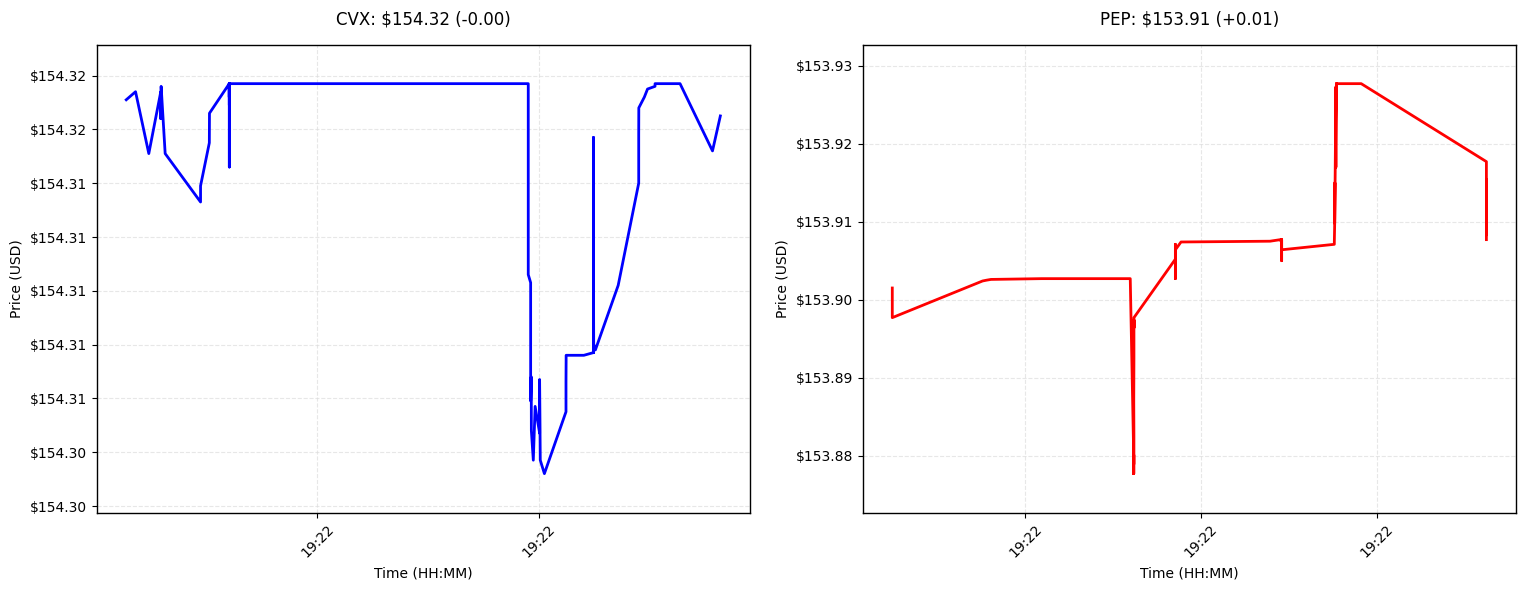

<Figure size 640x480 with 0 Axes>

In [ ]:
import asyncio, websockets, json
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FormatStrFormatter

URL = "wss://ws.eodhistoricaldata.com/ws/us?api_token={API_Eodhd}"

async def main(api_token):
    cvx_data = []
    pep_data = []
    plt.ion()
    
    # Create figure with white background and enhanced style
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'axes.grid': True,
        'grid.color': '#dddddd',
        'axes.linewidth': 1.0,
        'font.size': 10
    })
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    try:
        async with websockets.connect(URL.format(API_Eodhd=api_token)) as ws:
            await ws.send(json.dumps({"action":"subscribe","symbols":"CVX,PEP"}))
            while True:
                try:
                    msg = await ws.recv()
                    data = json.loads(msg)
                    if isinstance(data, dict) and "p" in data and "s" in data:
                        row = {
                            "price": float(data["p"]),
                            "time": pd.to_datetime(int(data["t"]), unit='ms') if "t" in data else pd.Timestamp.now()
                        }
                        
                        if data["s"] == "CVX":
                            cvx_data.append(row)
                            df_cvx = pd.DataFrame(cvx_data[-100:])
                            ax1.clear()
                            ax1.plot(df_cvx['time'], df_cvx['price'], '-b', linewidth=2)
                            
                            # Formatting
                            ax1.xaxis.set_major_formatter(DateFormatter('%H:%M'))
                            ax1.yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
                            ax1.tick_params(axis='both', which='major', labelsize=10)
                            ax1.tick_params(axis='x', rotation=45)
                            
                            # Dynamic y-axis
                            if len(df_cvx) > 1:
                                price_range = df_cvx['price'].max() - df_cvx['price'].min()
                                y_min = df_cvx['price'].min() - price_range * 0.1
                                y_max = df_cvx['price'].max() + price_range * 0.1
                                ax1.set_ylim(y_min, y_max)
                            
                            current_price = df_cvx['price'].iloc[-1]
                            price_change = current_price - df_cvx['price'].iloc[0]
                            ax1.set_title(f"CVX: ${current_price:.2f} ({price_change:+.2f})", pad=15)
                            ax1.set_xlabel("Time (HH:MM)")
                            ax1.set_ylabel("Price (USD)")
                            ax1.grid(True, linestyle='--', alpha=0.7)

                        elif data["s"] == "PEP":
                            pep_data.append(row)
                            df_pep = pd.DataFrame(pep_data[-100:])
                            ax2.clear()
                            ax2.plot(df_pep['time'], df_pep['price'], '-r', linewidth=2)
                            
                            # Formatting
                            ax2.xaxis.set_major_formatter(DateFormatter('%H:%M'))
                            ax2.yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
                            ax2.tick_params(axis='both', which='major', labelsize=10)
                            ax2.tick_params(axis='x', rotation=45)
                            
                            # Dynamic y-axis
                            if len(df_pep) > 1:
                                price_range = df_pep['price'].max() - df_pep['price'].min()
                                y_min = df_pep['price'].min() - price_range * 0.1
                                y_max = df_pep['price'].max() + price_range * 0.1
                                ax2.set_ylim(y_min, y_max)
                            
                            current_price = df_pep['price'].iloc[-1]
                            price_change = current_price - df_pep['price'].iloc[0]
                            ax2.set_title(f"PEP: ${current_price:.2f} ({price_change:+.2f})", pad=15)
                            ax2.set_xlabel("Time (HH:MM)")
                            ax2.set_ylabel("Price (USD)")
                            ax2.grid(True, linestyle='--', alpha=0.7)
                        
                        # Display updated plots
                        clear_output(wait=True)
                        plt.tight_layout()
                        display(fig)
                        plt.pause(0.01)
                        
                except KeyboardInterrupt:
                    print("\nStopping...")
                    break
                except Exception as e:
                    continue
    finally:
        print("WebSocket connection closed")
        plt.close()

# Handle both Jupyter and regular Python environments
try:
    loop = asyncio.get_event_loop()
    if loop.is_running():
        await main(API_Eodhd)
    else:
        loop.run_until_complete(main(API_Eodhd))
except KeyboardInterrupt:
    print("\nProgram stopped by user")